# Backpropagation handmade

In [45]:
# 1. Build the class for math expressions
# 2. Build some basic operations
# 3. Build computation graph
# 4. Build some activations
# 5. Build backpropagation

In [46]:
# inspired by (and 80% copied from :)) micrograd / Andrej Karpathy
# https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ

In [47]:
import numpy as np

import math
import matplotlib.pyplot as plt

In [48]:
def f(x): 
    return 3*x*x - 4*x + 5

def dfdx(x):
    return 6*x - 4

In [49]:
x = np.arange(-5, 5, 0.25)

y = f(x)
dydx = dfdx(x)

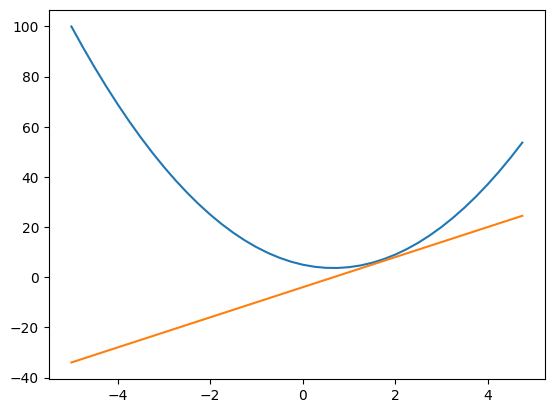

In [50]:
plt.plot(x, y)
plt.plot(x, dydx)
plt.show()

h:  1
Numerical:  [-31.  -29.5 -28.  -26.5 -25.  -23.5 -22.  -20.5 -19.  -17.5 -16.  -14.5
 -13.  -11.5 -10.   -8.5  -7.   -5.5  -4.   -2.5  -1.    0.5   2.    3.5
   5.    6.5   8.    9.5  11.   12.5  14.   15.5  17.   18.5  20.   21.5
  23.   24.5  26.   27.5]
Absolute difference:  [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


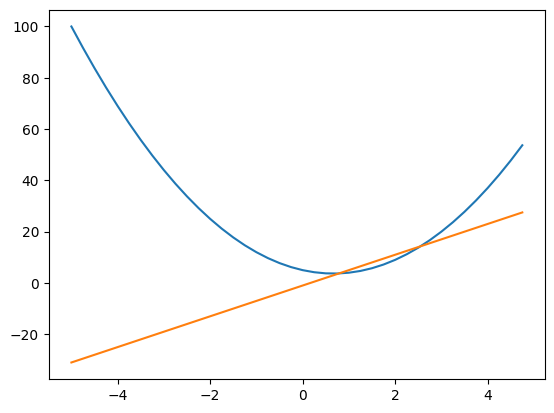

--------------------
h:  0.1
Numerical:  [-33.7 -32.2 -30.7 -29.2 -27.7 -26.2 -24.7 -23.2 -21.7 -20.2 -18.7 -17.2
 -15.7 -14.2 -12.7 -11.2  -9.7  -8.2  -6.7  -5.2  -3.7  -2.2  -0.7   0.8
   2.3   3.8   5.3   6.8   8.3   9.8  11.3  12.8  14.3  15.8  17.3  18.8
  20.3  21.8  23.3  24.8]
Absolute difference:  [0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3]


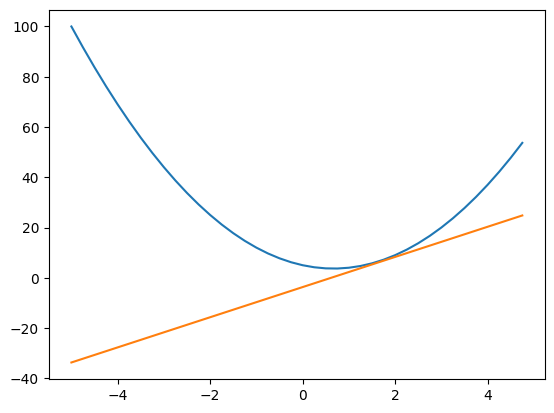

--------------------
h:  0.01
Numerical:  [-33.97 -32.47 -30.97 -29.47 -27.97 -26.47 -24.97 -23.47 -21.97 -20.47
 -18.97 -17.47 -15.97 -14.47 -12.97 -11.47  -9.97  -8.47  -6.97  -5.47
  -3.97  -2.47  -0.97   0.53   2.03   3.53   5.03   6.53   8.03   9.53
  11.03  12.53  14.03  15.53  17.03  18.53  20.03  21.53  23.03  24.53]
Absolute difference:  [0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03
 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03
 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03]


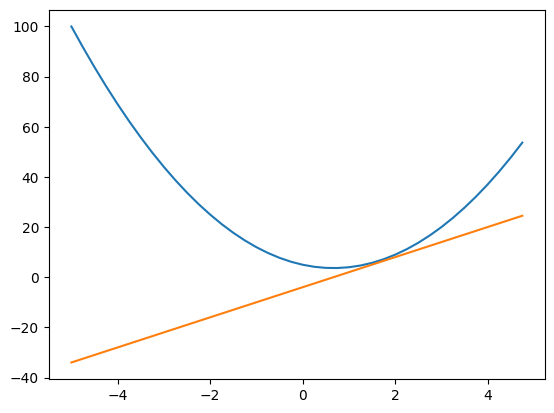

--------------------
h:  0.001
Numerical:  [-33.997 -32.497 -30.997 -29.497 -27.997 -26.497 -24.997 -23.497 -21.997
 -20.497 -18.997 -17.497 -15.997 -14.497 -12.997 -11.497  -9.997  -8.497
  -6.997  -5.497  -3.997  -2.497  -0.997   0.503   2.003   3.503   5.003
   6.503   8.003   9.503  11.003  12.503  14.003  15.503  17.003  18.503
  20.003  21.503  23.003  24.503]
Absolute difference:  [0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003
 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003
 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003
 0.003 0.003 0.003 0.003]


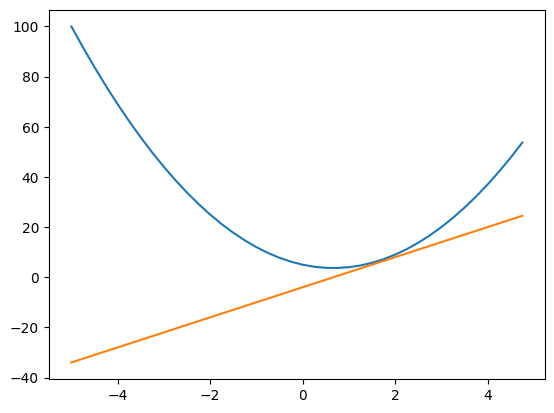

--------------------
h:  0.0001
Numerical:  [-33.9997 -32.4997 -30.9997 -29.4997 -27.9997 -26.4997 -24.9997 -23.4997
 -21.9997 -20.4997 -18.9997 -17.4997 -15.9997 -14.4997 -12.9997 -11.4997
  -9.9997  -8.4997  -6.9997  -5.4997  -3.9997  -2.4997  -0.9997   0.5003
   2.0003   3.5003   5.0003   6.5003   8.0003   9.5003  11.0003  12.5003
  14.0003  15.5003  17.0003  18.5003  20.0003  21.5003  23.0003  24.5003]
Absolute difference:  [0.0003 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003
 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003
 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003
 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003]


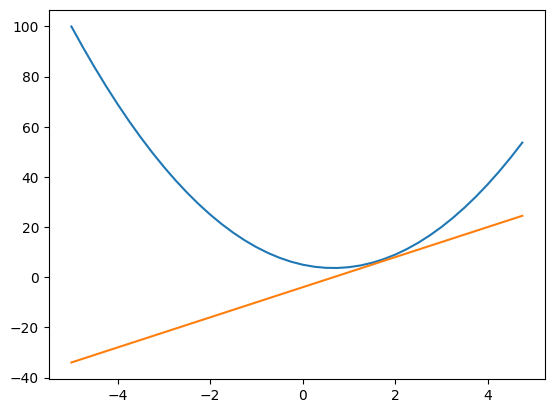

--------------------
h:  1e-05
Numerical:  [-33.99997 -32.49997 -30.99997 -29.49997 -27.99997 -26.49997 -24.99997
 -23.49997 -21.99997 -20.49997 -18.99997 -17.49997 -15.99997 -14.49997
 -12.99997 -11.49997  -9.99997  -8.49997  -6.99997  -5.49997  -3.99997
  -2.49997  -0.99997   0.50003   2.00003   3.50003   5.00003   6.50003
   8.00003   9.50003  11.00003  12.50003  14.00003  15.50003  17.00003
  18.50003  20.00003  21.50003  23.00003  24.50003]
Absolute difference:  [3.00011120e-05 3.00015881e-05 3.00006432e-05 3.00011193e-05
 2.99987532e-05 2.99999399e-05 2.99997055e-05 2.99994711e-05
 2.99999472e-05 2.99997128e-05 2.99994783e-05 2.99999544e-05
 2.99997200e-05 2.99998409e-05 2.99999617e-05 2.99999049e-05
 3.00000258e-05 2.99999690e-05 3.00000010e-05 3.00000331e-05
 2.99999763e-05 3.00000083e-05 2.99999959e-05 2.99999836e-05
 3.00000156e-05 3.00000476e-05 3.00000796e-05 3.00001117e-05
 3.00000549e-05 3.00001757e-05 3.00002966e-05 3.00002398e-05
 3.00000054e-05 3.00004815e-05 3.0000247

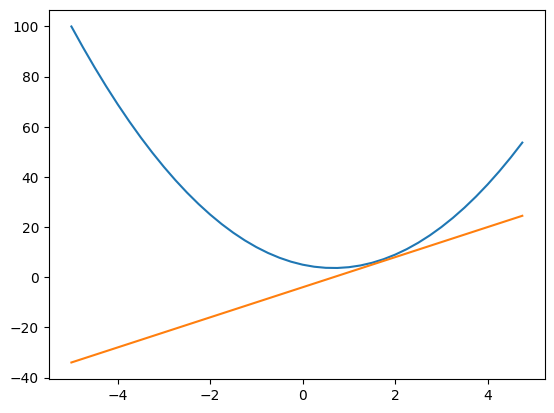

--------------------


In [51]:
for h in [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]:
    print('h: ', h)
    num_dydx = (f(x+h) - f(x)) / h
    
    print('Numerical: ', num_dydx)
    print('Absolute difference: ', np.abs(num_dydx - dydx))
    
    plt.plot(x, y)
    plt.plot(x, num_dydx)
    plt.show()
    print('-' * 20)

In [52]:
a, b, c, d = 3.0, 2.0, 5.0, 5.0

h = 1e-4

L = (a*b +c) * d

b += h

L1 = (a*b +c) * d

print(f'L: {L}')
print(f'L1: {L1}')

print(f'dL/d[something]: {L1 / h - L / h}')

L: 55.0
L1: 55.00150000000001
dL/d[something]: 15.0


In [53]:
class Parameter:
    def __init__(self, value: float, name: str) -> None:
        self._value = value
        self._name = name

        self._grad = 0.0
        self._backward = lambda: None
        self._parents = []

    def __repr__(self) -> str:
        return f"Parameter {self._name} = {self._value}; dL/d[{self._name}] = {self._grad}"

    def __mul__(self, other):
        result = Parameter(
            self._value * other._value,
            f'{self._name} * {other._name}'
        )
        result._parents = [self, other]

        def _backward():
            self._grad += other._value * result._grad #dL / dself
            other._grad += self._value * result._grad # dL / dother

        result._backward = _backward

        return result

    def __add__(self, other):
        result = Parameter(
            self._value + other._value,
            f'[{self._name} + {other._name}]'
        )
        result._parents = [self, other]

        def _backward():
            self._grad += 1.0 * result._grad  #dL / dself
            other._grad += 1.0 * result._grad # dL / dother

        result._backward = _backward

        return result

    def sigmoid(self):
        # f(x) = 1 / (1 + exp(self._value))
        # f'(x) = f(x) * (1 - f(x))

        val = 1.0 / (1.0 + math.exp(-self._value))

        result = Parameter(
            val,
            f"σ({self._name})"
        )
        result._parents = [self]

        def _backward():
            self._grad = result._grad * val * (1 - val)

        result._backward = _backward

        return result

#lab2

    def backward(self):
        stack = []
        visited = set()
        self._topo_sort(visited, stack)
        self._grad = 1.0

        for node in reversed(stack):
            node._backward()

    def _topo_sort(self, visited, stack):
        if self in visited:
            return
        visited.add(self)
        for parent in self._parents:
            parent._topo_sort(visited, stack)
        stack.append(self)

    def relu(self):
        val = max(0, self._value)
        result = Parameter(
            val,
            f"ReLU({self._name})"
        )
        result._parents = [self]

        def _backward():
            self._grad = result._grad if self._value > 0 else 0

        result._backward = _backward

        return result

    def softplus(self):
        val = math.log(1 + math.exp(self._value))
        result = Parameter(
            val,
            f"Softplus({self._name})"
        )
        result._parents = [self]

        def _backward():
            self._grad = result._grad * (1 / (1 + math.exp(-self._value)))

        result._backward = _backward

        return result
        

def sgd(learning_rate, *params):
    for param in params:
        param._value -= param._grad * learning_rate 
        param._grad = 0

In [54]:
a = Parameter(3.0, 'a')
b = Parameter(2.0, 'b')
c = Parameter(5.0, 'c')

Forward pass

In [55]:
op1 = a.relu()
op2 = b.softplus()
op3 = c.sigmoid()

print(op1)
print(op2)
print(op3)

Parameter ReLU(a) = 3.0; dL/d[ReLU(a)] = 0.0
Parameter Softplus(b) = 2.1269280110429727; dL/d[Softplus(b)] = 0.0
Parameter σ(c) = 0.9933071490757153; dL/d[σ(c)] = 0.0


Backward pass

In [56]:
op1.backward()
op2.backward()
op3.backward()

print(op1)
print(op2)
print(op3)

Parameter ReLU(a) = 3.0; dL/d[ReLU(a)] = 1.0
Parameter Softplus(b) = 2.1269280110429727; dL/d[Softplus(b)] = 1.0
Parameter σ(c) = 0.9933071490757153; dL/d[σ(c)] = 1.0


In [59]:
sgd(0.001, a, b, c)
print(a)
print(b)
print(c)

Parameter a = 2.999; dL/d[a] = 0
Parameter b = 1.9991192029220222; dL/d[b] = 0
Parameter c = 4.9999933519433295; dL/d[c] = 0
